In [1]:
import pandas as pd
import numpy as np
import math

# En esta parte del código se generan 3650 datos aleatorios en forma de fila, para los años 1992, 1993, 1994 y 1995
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# Aquí se calculan las medias resultantes con la funcion np.random.normal por año de acuerdo con las desviaciones estándar 
# 200000, 100000, 140000 y 70000 respectivamente
df_mean = df.mean(axis=1)

# Las medias resultantes se guardan en una lista, lo mismo para las medias exactas y los años
means = [df_mean.loc[1992], df_mean.loc[1993], df_mean.loc[1994], df_mean.loc[1995]]
years = ['1992', '1993', '1994', '1995']
exact_means = [200000, 100000, 140000, 70000]

# En esta parte se crean los intervalos de confianza con 1 − α = 0.95, en este caso son cuatro elementos (tuplas) organizados en 
# una lista donde cada elemento corresponde a un año
ci=[(means[i]-1.96*(exact_means[i]/ math.sqrt(3650)), means[i]+1.96*(exact_means[i]/ math.sqrt(3650))) for i in range(4)]

<IPython.core.display.Javascript object>


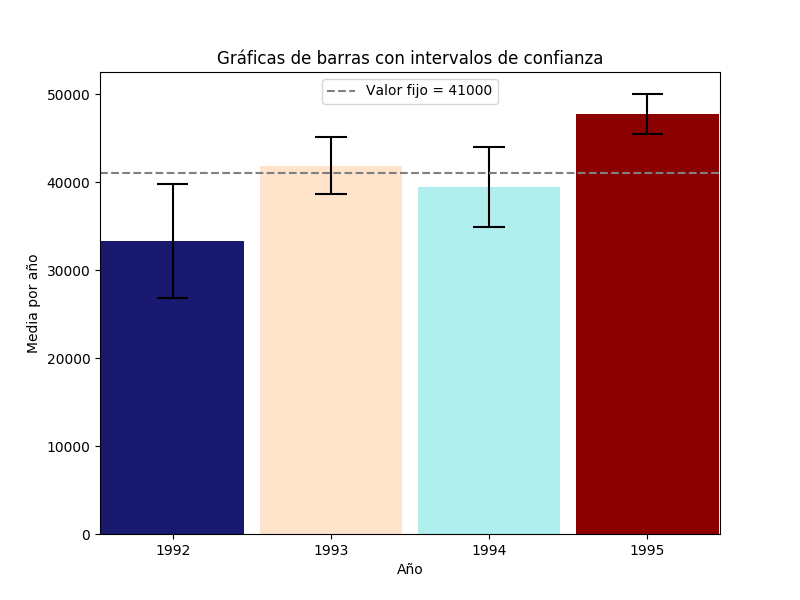

In [4]:
# Se usa la magic function junto con las librerías de visualización
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Este valor es la linea horizontal punteada de color gris en la visualización, se puede cambiar en un rango de 0 a 50000 
# Al cambiar este valor si está por fuera del un intervalo de confianza se tornará de color oscuro, si está dentro de un 
# intervalo de confianza se tornará claro
# Si este valor está por encima de una barra se tornará de color rojo, si está por debajo se tornará de color azul
value=41000
plt.figure(figsize=(8, 6))
x = np.arange(len(years))

# Estas listas asocian un color dependiendo del rango 0.0 a 1.0 
clist_1 = [(0, "white"), (0.125, "seashell"), (0.25, "peachpuff"), (0.375, "lightcoral"), (0.5, "indianred"),
         (0.625, "brown"), (0.75, "firebrick"), (0.875, "maroon"), (1, "darkred")]
clist_2 = [(0, "white"), (0.125, "aliceblue"), (0.25, "paleturquoise"), (0.375, "cornflowerblue"), (0.5, "royalblue"),
         (0.625, "blue"), (0.75, "mediumblue"), (0.875, "navy"), (1, "midnightblue")]

# Aquí se creó una paleta de colores de forma manual
rvb_1 = mcolors.LinearSegmentedColormap.from_list("", clist_1)
rvb_2 = mcolors.LinearSegmentedColormap.from_list("", clist_2)

# En esta parte del código se grafican las barras dependiendo si el valor anteriormente mencionado está por afuera 
# del intervalo de confianza de cada una de las cuatro barras (1.0 está asociado a los colores oscuros)
for i in means:
    if value>ci[means.index(i)][1]:
        plt.bar(means.index(i), i, width=0.9, color=rvb_2(1.0))
for j in means:
    if value<ci[means.index(j)][0]:
        plt.bar(means.index(j), j, width=0.9, color=rvb_1(1.0))

# En esta parte del código se grafican las barras dependiendo si el valor anteriormente mencionado está adentro del intervalo
# de confianza de cada una de las cuatro barras (aquí se usaron proporciones con fraccionarios que pueden ser un poco confusas)
for i in means:
    if value<ci[means.index(i)][1] and value>ci[means.index(i)][0] and value<i:
        plt.bar(means.index(i), i, width=0.9, color=rvb_1((i-value)/(i-ci[means.index(i)][0])))
for j in means:
    if value<ci[means.index(j)][1] and value>ci[means.index(j)][0] and value>j:
        plt.bar(means.index(j), j, width=0.9, color=rvb_2((value-j)/(ci[means.index(j)][1]-j)))

# Aquí se graficaron los intervalos de confianza de forma manual
for i in range (4):
    plt.vlines(x=x[i], ymin=ci[i][0], ymax=ci[i][1], color='black')

for j in range (4):
    plt.hlines(y=ci[j][0], xmin=-0.1+j, xmax=0.1+j, color='black')
    plt.hlines(y=ci[j][1], xmin=-0.1+j, xmax=0.1+j, color='black')
    
# Este es el código para graficar la linea horizontal punteada de color gris
plt.axhline(y=value, color='gray', linestyle='--')

# Se definen los ejes x e y junto con las márgenes en el eje x
plt.xticks(x, years)
plt.margins(x=0.0023)

# Aquí se determinan el nombre de la visualización, el nombre de los ejes y el valor mencionado anteriormente
plt.xlabel('Año')
plt.ylabel('Media por año')
plt.title('Gráficas de barras con intervalos de confianza')
plt.legend(['Valor fijo = {}'.format(value)], loc='upper center', prop={'size': 10})
plt.show()